# ECDF plots

In [2]:
# uncomment the following:

library('tidyverse')
options(repr.plot.res = 300)  # This is useful to get sensible default sizing

otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession) %>%
     drop_na()
otter.data %>% head

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



species,museum,accession,characteristic,value
<fct>,<fct>,<fct>,<chr>,<dbl>
A. cinerea,AMNH,101458,m1,15.100
A. cinerea,AMNH,101461,m1,12.740
A. cinerea,AMNH,101466,m1,12.425
A. cinerea,AMNH,101635,m1,13.400
A. cinerea,AMNH,101459,m1,14.400
A. cinerea,AMNH,101462,m1,14.525


Make an ECDF plot of `value` and:
- facet by characteristic
- allow the x-axis of each facetted plot to be independent (hint use the `scales` argument)
- color/group by species  

Species names are typically italicized. Use `theme` and `element_text` to adjust the legend text so that it is italic.

Which otter species has the smallest skull?

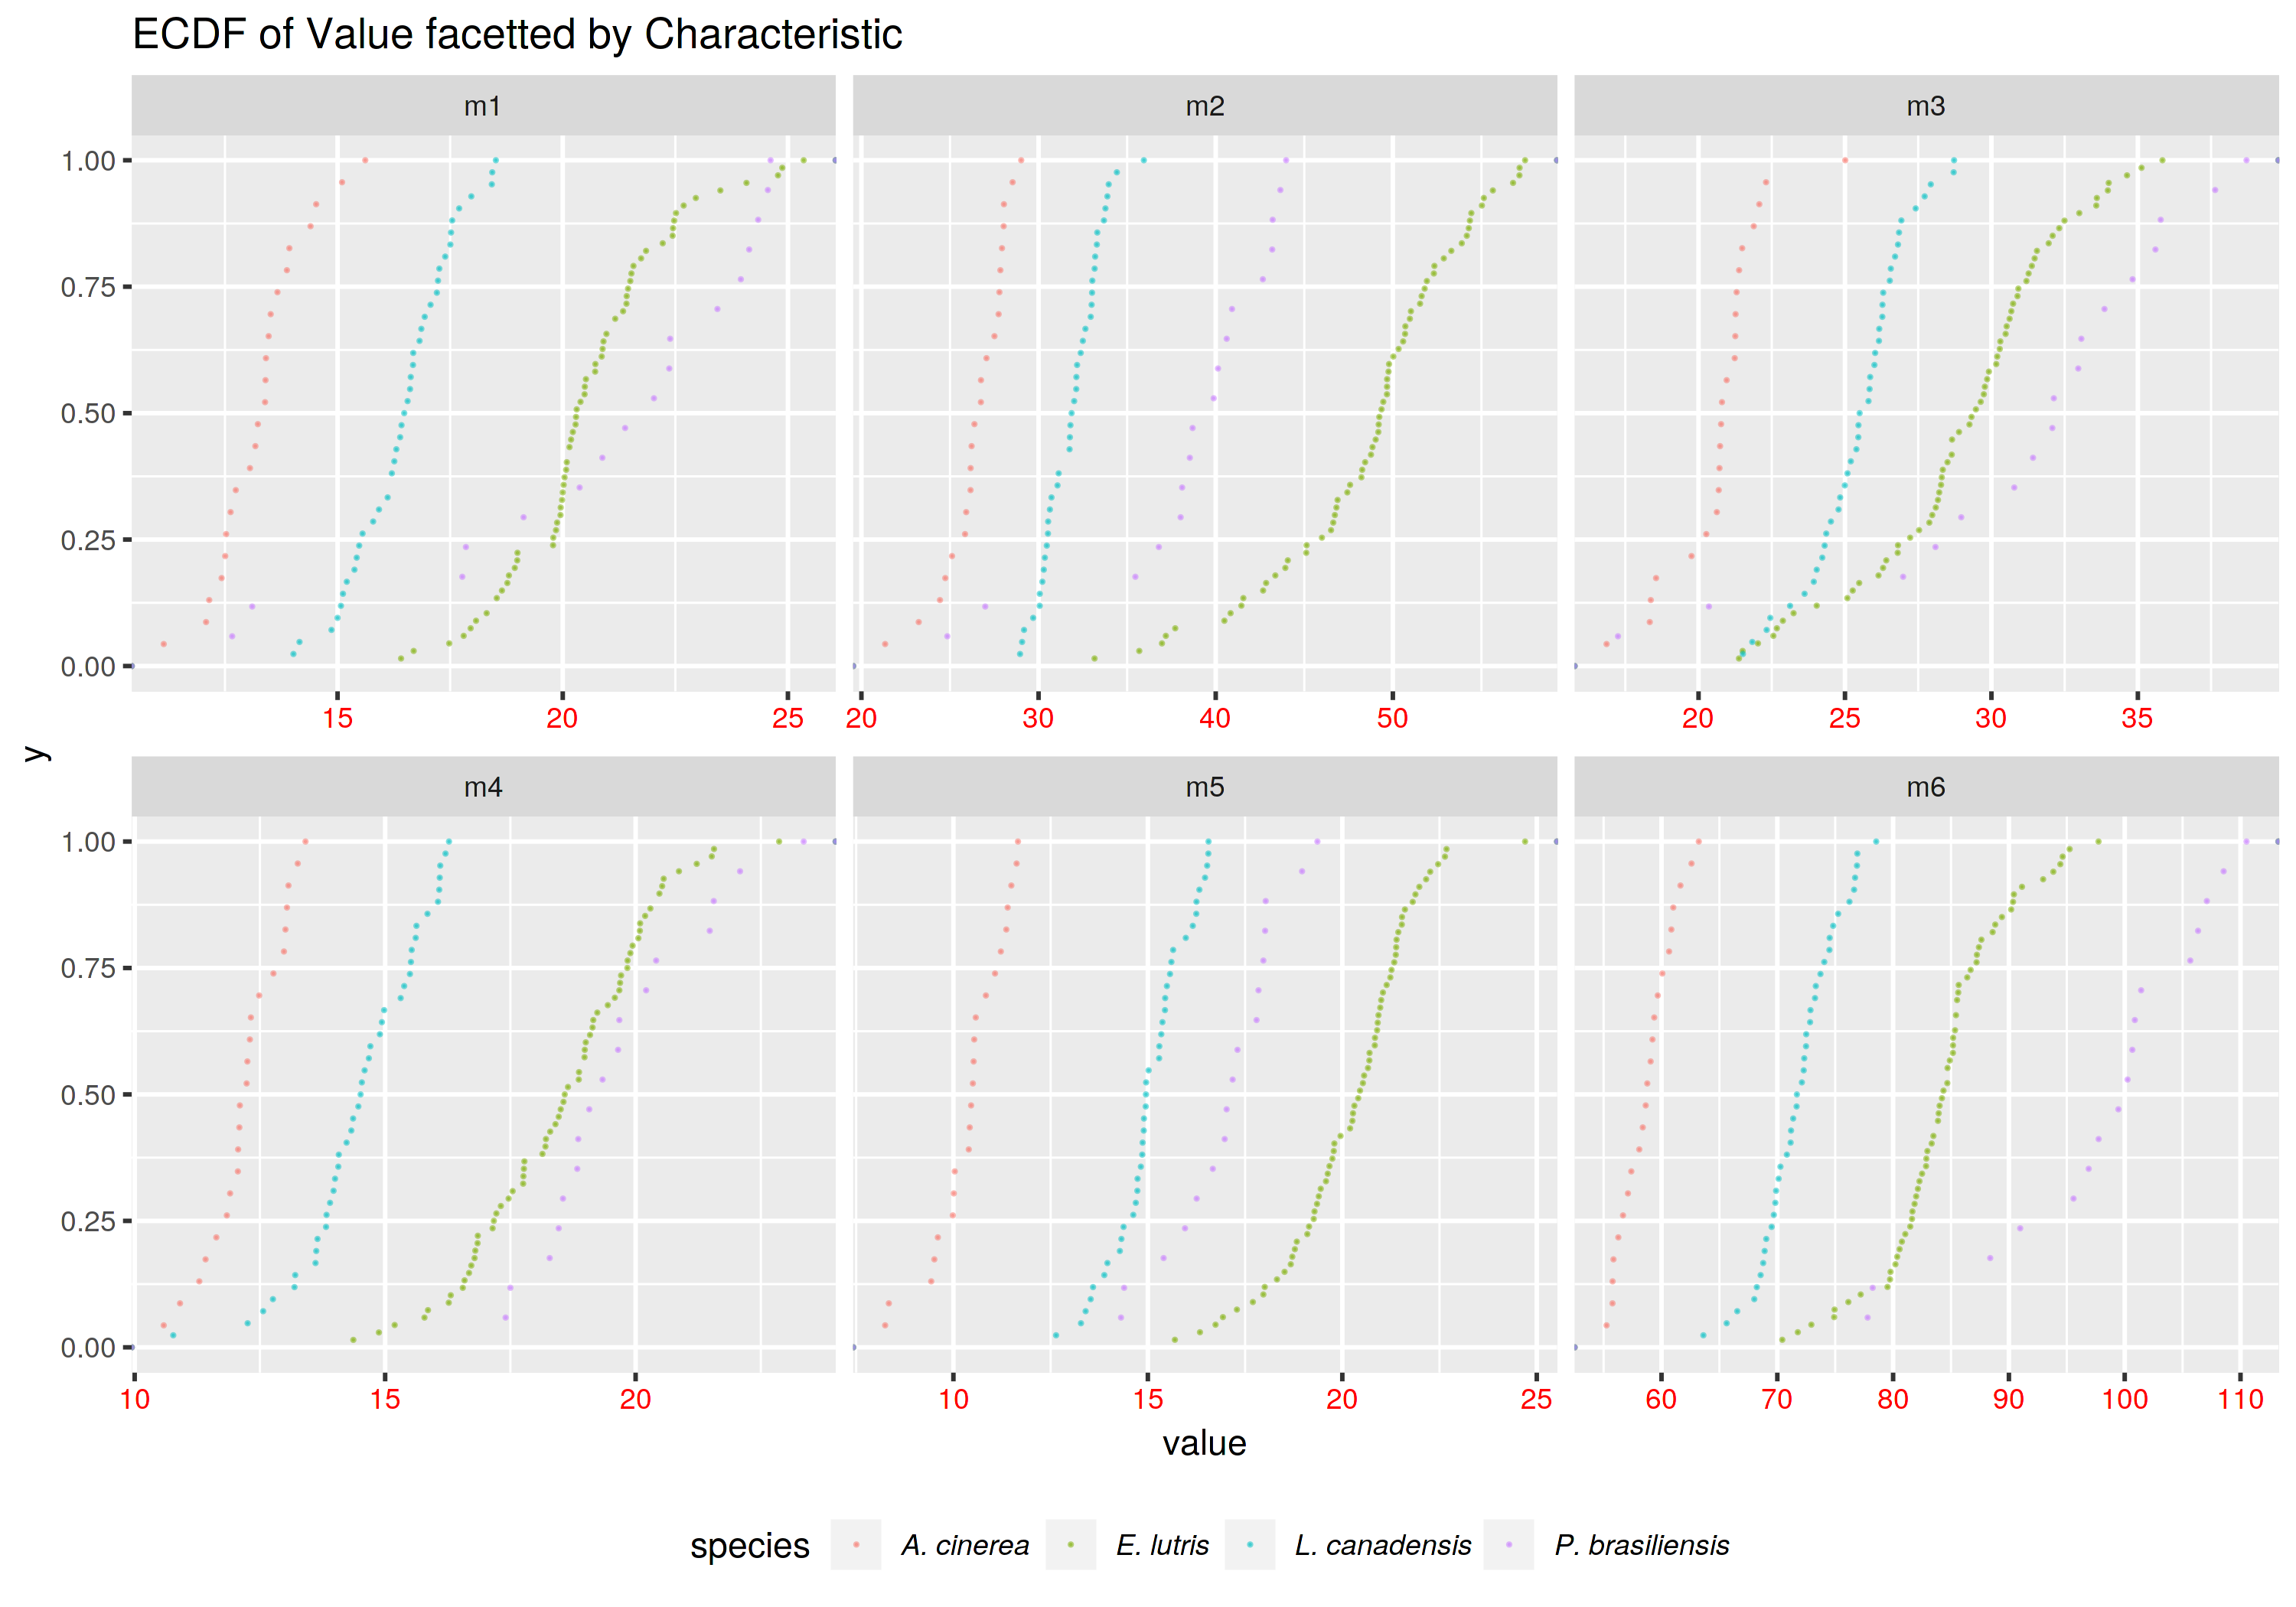

In [3]:
options(repr.plot.res=300, repr.plot.height=7, repr.plot.width=10)
p=ggplot(otter.data, aes(x=value, color=species))
p=p+facet_wrap(~characteristic, scales="free_x") #or "free_y" for just y
p=p+stat_ecdf(geom="point", size=.05, alpha=.5)

p=p+theme(legend.text=element_text(face='italic')
            , axis.text.x=element_text(color='red'), legend.position='bottom'
         )

p=p+ggtitle('ECDF of Value facetted by Characteristic')

p

A. cinerea have the smallest skulls (as shown by red points being lower on the x axis)

In [10]:
otter.data$species = factor(otter.data$species , 
                            levels=c("A. cinerea","L. canadensis","E. lutris","P. brasiliensis"))

In [17]:
library(forcats) # to use reorder, for organizing the factor levels, that we did manually above. 
# can also graph the otter.data$species.new below

In [16]:
otter.data %>%  
    mutate(species.new = fct_reorder(species, value)) # create new cols

species,museum,accession,characteristic,value,species.new
<fct>,<fct>,<fct>,<chr>,<dbl>,<fct>
A. cinerea,AMNH,101458,m1,15.100,A. cinerea
A. cinerea,AMNH,101461,m1,12.740,A. cinerea
A. cinerea,AMNH,101466,m1,12.425,A. cinerea
A. cinerea,AMNH,101635,m1,13.400,A. cinerea
A. cinerea,AMNH,101459,m1,14.400,A. cinerea
A. cinerea,AMNH,101462,m1,14.525,A. cinerea
A. cinerea,AMNH,101467,m1,13.665,A. cinerea
A. cinerea,AMNH,101471,m1,13.175,A. cinerea
A. cinerea,AMNH,101636,m1,12.505,A. cinerea


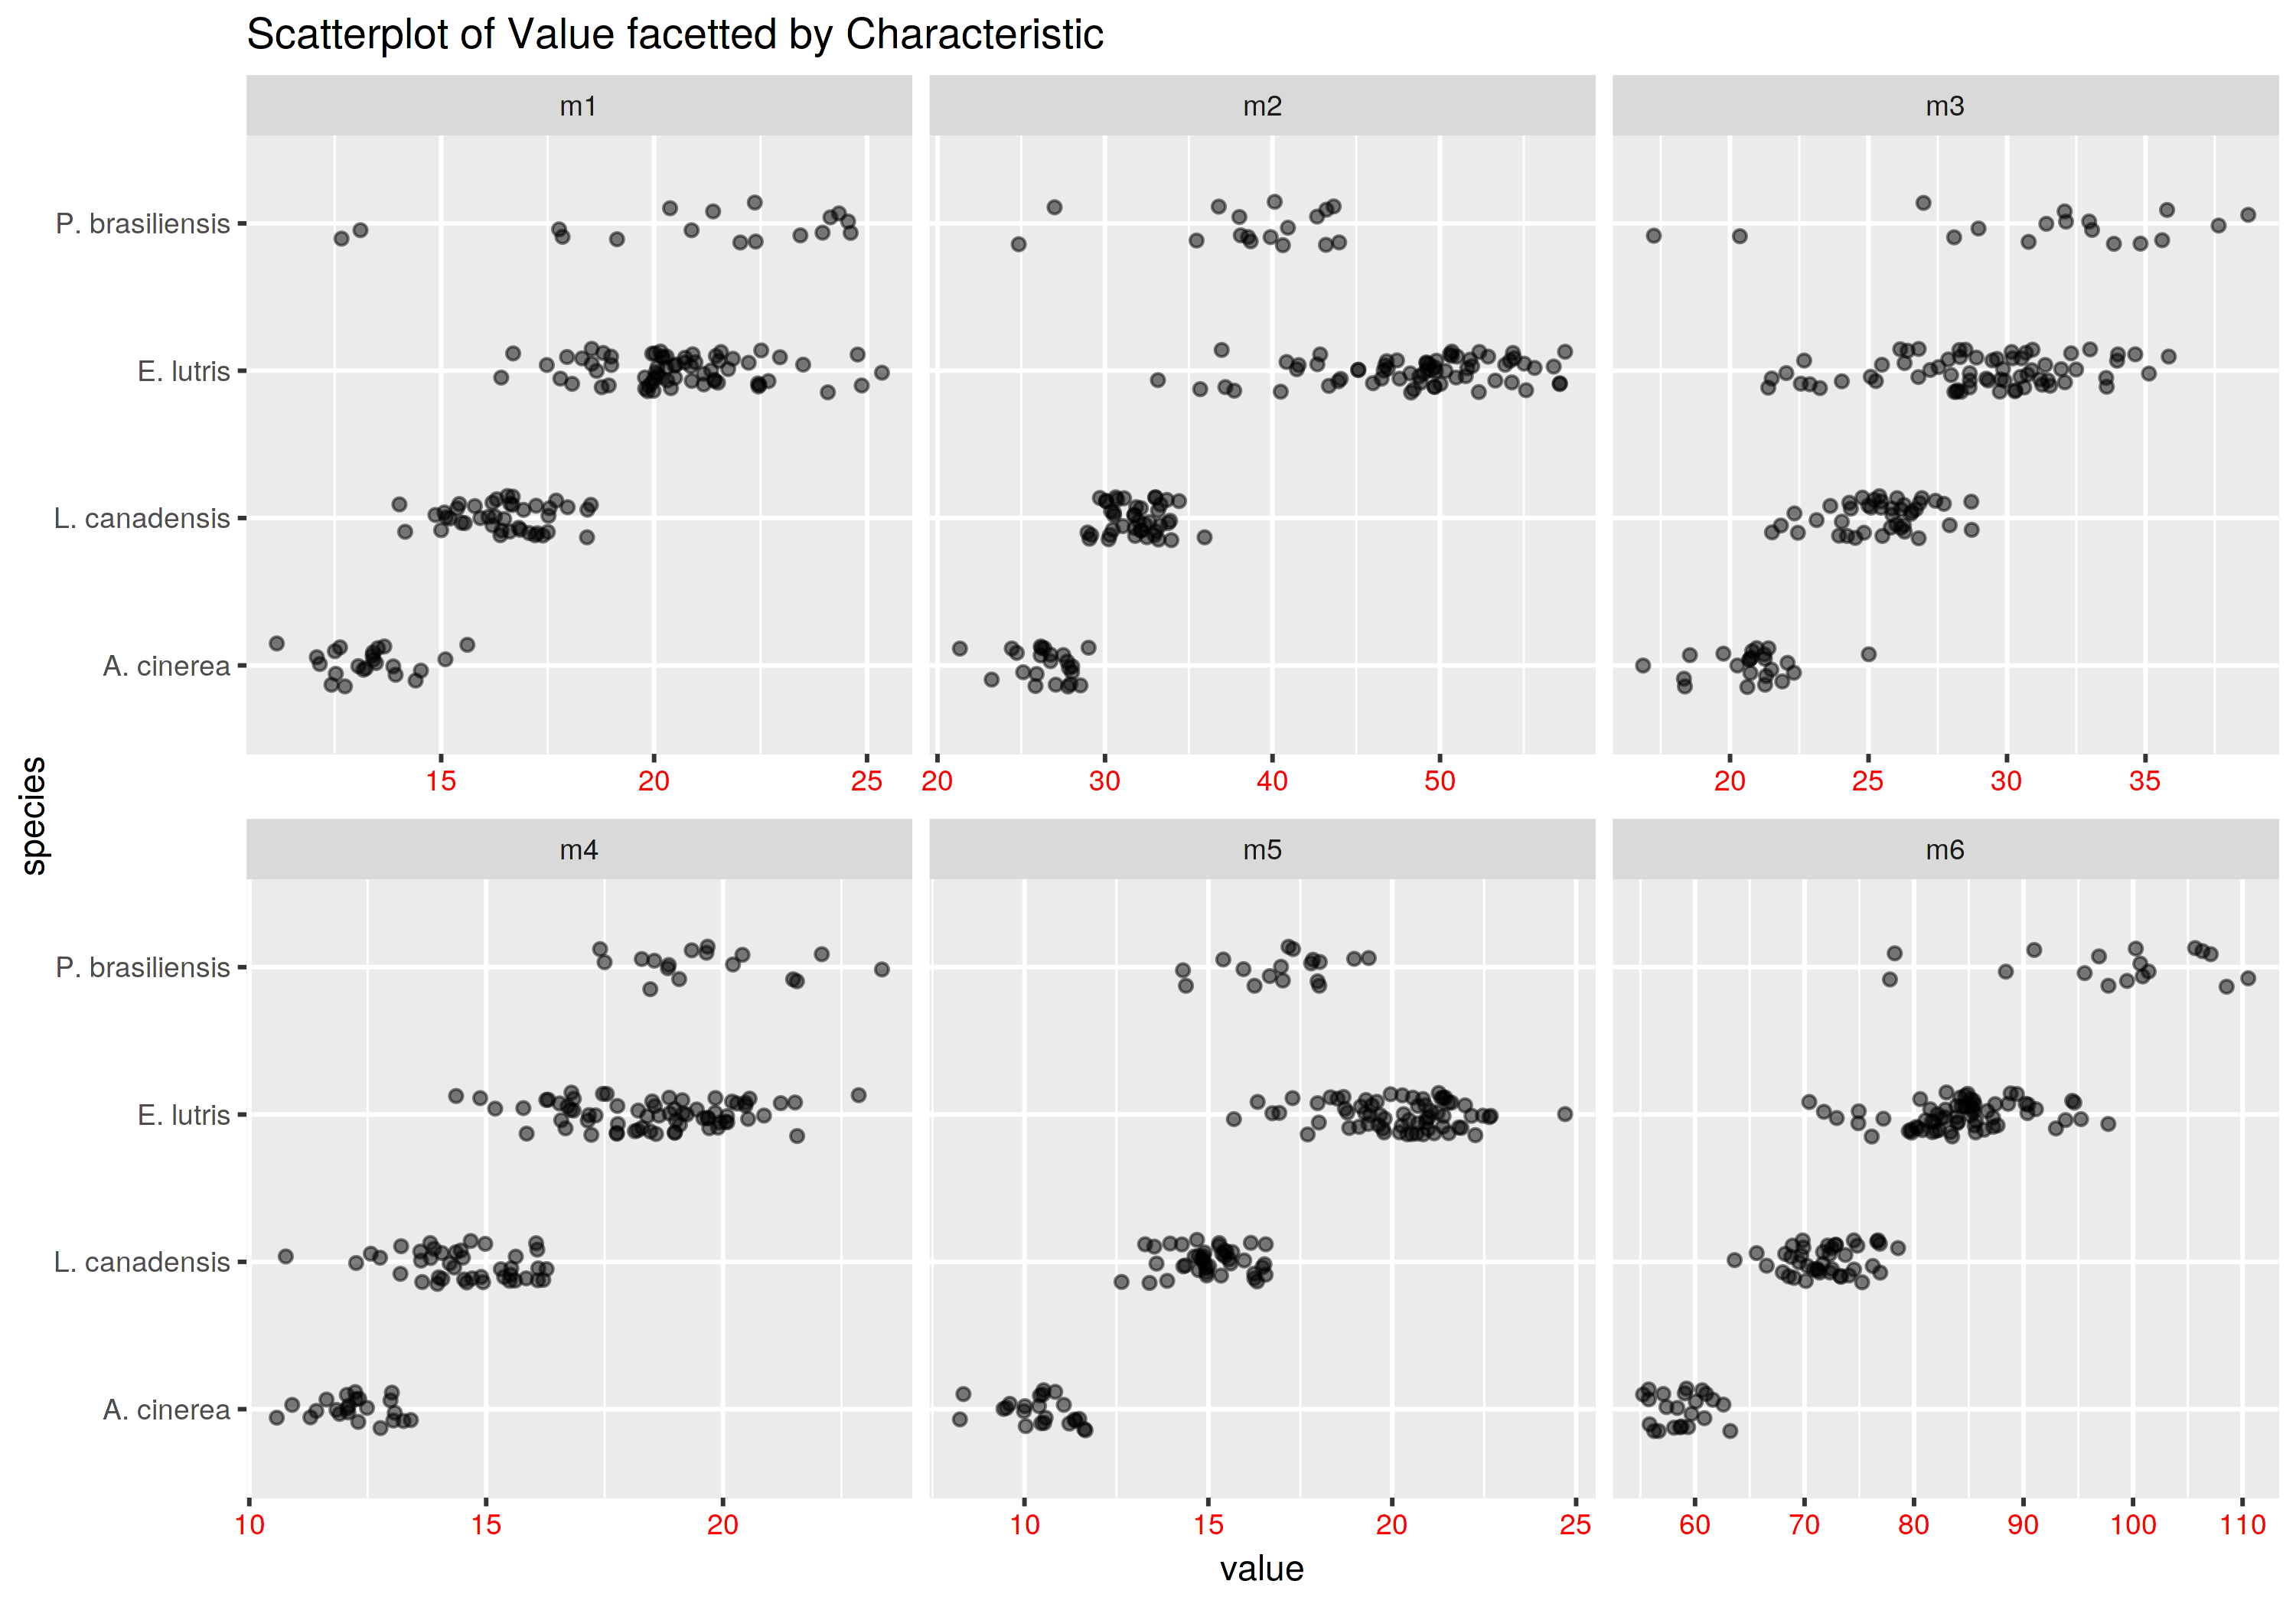

In [18]:
options(repr.plot.res=300, repr.plot.height=7, repr.plot.width=10)
p=ggplot(otter.data, aes(x=value, y=species))
p=p+geom_point(position=position_jitter(h=.15, w=0), alpha=.5)
p=p+facet_wrap(~characteristic, scales="free_x") #or "free_y" for just y
p=p+theme(legend.text=element_text(face='italic')
            , axis.text.x=element_text(color='red'), legend.position='bottom'
         )

p=p+ggtitle('Scatterplot of Value facetted by Characteristic')

p